In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import nengo
from nengo.dists import Uniform
from nengo.processes import Piecewise
from nengo.utils.ensemble import response_curves
from stp_ocl_implementation import *

In [2]:
model = nengo.Network(label='two stpLIF neurons')

with model:
    low_gain = nengo.Ensemble(1,1,neuron_type=stpLIF(),label='low_gain',\
                              bias=np.array([1]),gain=np.array([1]))
    high_gain = nengo.Ensemble(1,1,neuron_type=stpLIF(),label='high_gain',\
                               bias=np.array([1]),gain=np.array([1.5]))
    stim = nengo.Node(Piecewise({0:0,1:0.1,2:0}))
    nengo.Connection(stim,low_gain)
    nengo.Connection(stim,high_gain)
    model.lg_spikes=nengo.Probe(low_gain.neurons,'spikes')
    model.lg_res=nengo.Probe(low_gain.neurons,'resources')
    model.lg_cal=nengo.Probe(low_gain.neurons,'calcium')
    model.hg_spikes=nengo.Probe(high_gain.neurons,'spikes')
    model.hg_res=nengo.Probe(high_gain.neurons,'resources')
    model.hg_cal=nengo.Probe(high_gain.neurons,'calcium')
    model.stim_probe = nengo.Probe(stim)
    

In [3]:
# Run the model
sim_time = 3
with nengo.Simulator(model) as sim:
    sim.run(sim_time) # Run the simulation

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc.set('progress', 'progress_bar', 'nengo.utils.progress.TerminalProgressBar')`.

<IPython.core.display.Javascript object>

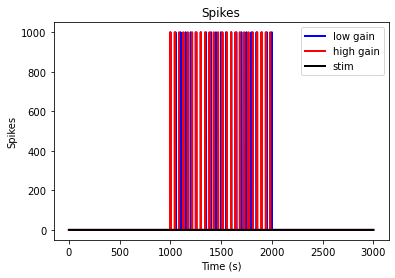

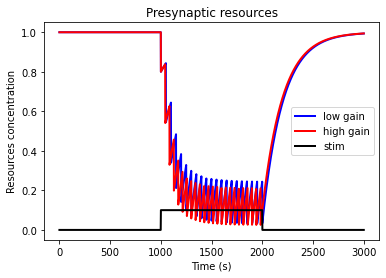

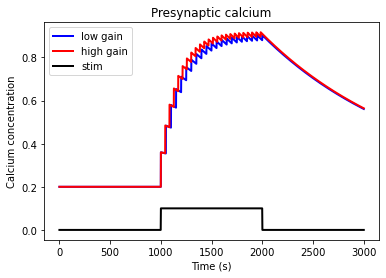

In [4]:
plt.figure()
plt.plot(sim.data[model.lg_spikes],linewidth=2,color='b',label='low gain')
plt.plot(sim.data[model.hg_spikes],linewidth=2,color='r',label='high gain')
plt.plot(sim.data[model.stim_probe],linewidth=2,color='k',label='stim')
plt.xlabel('Time (s)')
plt.ylabel('Spikes')
plt.legend()
plt.title('Spikes')
plt.show()

plt.figure()
plt.plot(sim.data[model.lg_res],linewidth=2,color='b',label='low gain')
plt.plot(sim.data[model.hg_res],linewidth=2,color='r',label='high gain')
plt.plot(sim.data[model.stim_probe],linewidth=2,color='k',label='stim')
plt.xlabel('Time (s)')
plt.ylabel('Resources concentration')
plt.legend()
plt.title('Presynaptic resources')
plt.show()

plt.figure()
plt.plot(sim.data[model.lg_cal],linewidth=2,color='b',label='low gain')
plt.plot(sim.data[model.hg_cal],linewidth=2,color='r',label='high gain')
plt.plot(sim.data[model.stim_probe],linewidth=2,color='k',label='stim')
plt.xlabel('Time (s)')
plt.ylabel('Calcium concentration')
plt.legend()
plt.title('Presynaptic calcium')
plt.show()

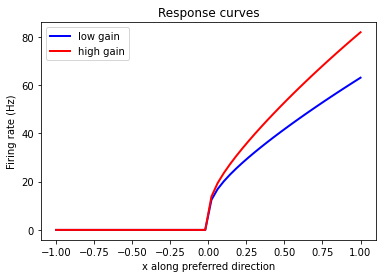

In [5]:
plt.figure()
plt.plot(*response_curves(low_gain,sim),label='low gain',linewidth=2,color='b')
plt.plot(*response_curves(high_gain,sim),label='high gain',linewidth=2,color='r')
plt.xlabel('x along preferred direction')
plt.ylabel('Firing rate (Hz)')
plt.legend()
plt.title('Response curves')
plt.show()